<h1 style='color: green; font-size: 36px; font-weight: bold;'>PROCESSO SELETIVO - MOVA</h1>

# ANÁLISE DE DADOS DA BOLSA DE VALORES: PREÇO DAS AÇÕES DA VALE

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [126]:
import warnings

warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://finance.yahoo.com/quote/VALE?p=VALE&.tsrc=fin-srch

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vale é uma mineradora multinacional brasileira e uma das maiores operadoras de logística do país. É uma das maiores empresas de mineração do mundo e também a maior produtora de minério de ferro, de pelotas e de níquel. A empresa também produz manganês, ferroliga, cobre, bauxita, potássio, caulim, alumina e alumínio.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo de relatório será apresentar uma análise dos preços das ações da Vale do período de 2018 até os dias atuais.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados foram foram obtidos no site do Yahooh finance. https://finance.yahoo.com/</p>

### Discionário de Dados:

- **Date** – dia.
- **Open** – O valor de abertura da ação no dia.
- **High** – Valor máximo que a ação chegou no dia.
- **Low** – O valor mínimo da ação no dia.
- **Close** – Preço de fechamento no dia.
- **Adj Close** – Preço de fechamento no dia após ser contabilizado as ações corporativas.
- **Volume** – Volume negociado no dia.


## Leitura dos dados

In [127]:
dados = pd.read_csv('../Dados/VALE.csv')

## Visualizar os dados

In [128]:
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,12.550000,12.800000,12.510000,12.770000,10.960676,19189400
1,2018-01-03,12.800000,12.870000,12.680000,12.850000,11.029342,20449600
2,2018-01-04,13.030000,13.090000,12.820000,12.830000,11.012177,22033100
3,2018-01-05,12.800000,13.090000,12.730000,13.090000,11.235338,20042800
4,2018-01-08,13.260000,13.320000,13.180000,13.320000,11.432750,17507000
...,...,...,...,...,...,...,...
847,2021-05-14,21.090000,21.280001,20.799999,21.030001,21.030001,29948400
848,2021-05-17,21.020000,21.670000,21.010000,21.590000,21.590000,37285900
849,2021-05-18,21.760000,22.040001,21.620001,21.900000,21.900000,40717500
850,2021-05-19,21.209999,21.400000,20.780001,21.110001,21.110001,48593500


## Verificando o tamanho do dataset

In [129]:
dados.shape

(852, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Tipos de dados

In [130]:
#Resumo de informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       852 non-null    object 
 1   Open       852 non-null    float64
 2   High       852 non-null    float64
 3   Low        852 non-null    float64
 4   Close      852 non-null    float64
 5   Adj Close  852 non-null    float64
 6   Volume     852 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 46.7+ KB


- **Convertendo data (string) para datatime**

In [131]:
dados['Date'] = pd.to_datetime(dados['Date'])

## Estatísticas descritivas

Essa parte é importante para fazer uma primeira análise dos dados, verificar se estão dentro do padrão esperado.

In [132]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,852.000000,852.000000,852.000000,852.000000,852.000000,8.520000e+02
mean,13.101268,13.278181,12.911291,13.098474,11.940782,2.568704e+07
std,2.607013,2.632086,2.586515,2.622501,2.737383,1.293243e+07
min,6.690000,6.980000,6.490000,6.580000,6.033273,5.251400e+06
25%,11.497500,11.637500,11.337500,11.490000,10.489005,1.783465e+07
50%,12.930000,13.110000,12.760000,12.930000,11.370259,2.322045e+07
75%,14.030000,14.180000,13.855000,14.022500,12.356924,2.956922e+07
max,22.969999,23.020000,22.010000,22.709999,22.709999,1.574684e+08


# <font color='red' style='font-size: 30px;'>Visualizando os dados</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

- **Análise do preço de fechamento das ações a partir de junho de 2018 até maio de 2021.**

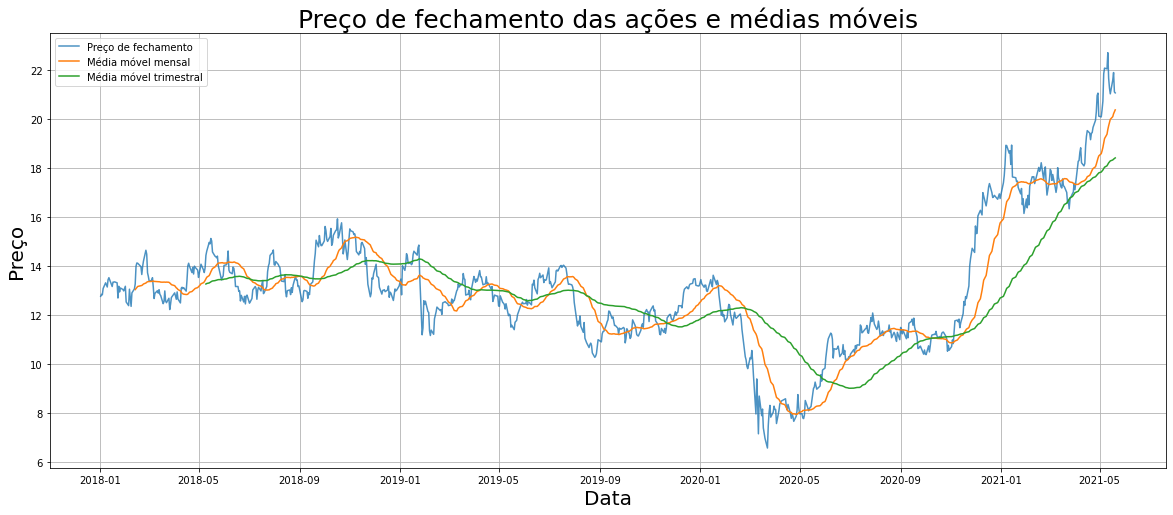

In [133]:
plt.figure(figsize=(20,8))
plt.plot(dados['Date'], dados['Close'], alpha = 0.8)
plt.plot(dados['Date'],dados['Close'].rolling(window = 30).mean())
plt.plot(dados['Date'],dados['Close'].rolling(window = 90).mean())
plt.grid()
plt.title('Preço de fechamento das ações e médias móveis', fontsize = 25)
plt.legend(['Preço de fechamento','Média móvel mensal','Média móvel trimestral'])
plt.xlabel('Data', fontsize = 20)
plt.ylabel('Preço',fontsize= 20)
plt.show()

A partir deste gráfico é possível observar que as ações atualmente estão com preços elavados em relação ao comportamento durante o periodo de tempo selecionado. E atualmente se encontram acima das médias mensais e trimestrais.
Observamos também que no primeiro semestre de 2020 tivemos uma queda brusca nos preços, que foi quando iniciou a pandemia devido ao Covid-19.

Outra análise interessante é quando se observa o preço das ações no périodo em que ocorreu o rompimento da barragem em Brumadinho, que foi em janeiro de 2019. Apesar de toda a repercução negativa em torno da empresa, suas ações não tiveram uma queda de preço tão brusca como veio a acontecer em 2020. 

- **Distribuição do preço de fechamento das ações em cada mês.**

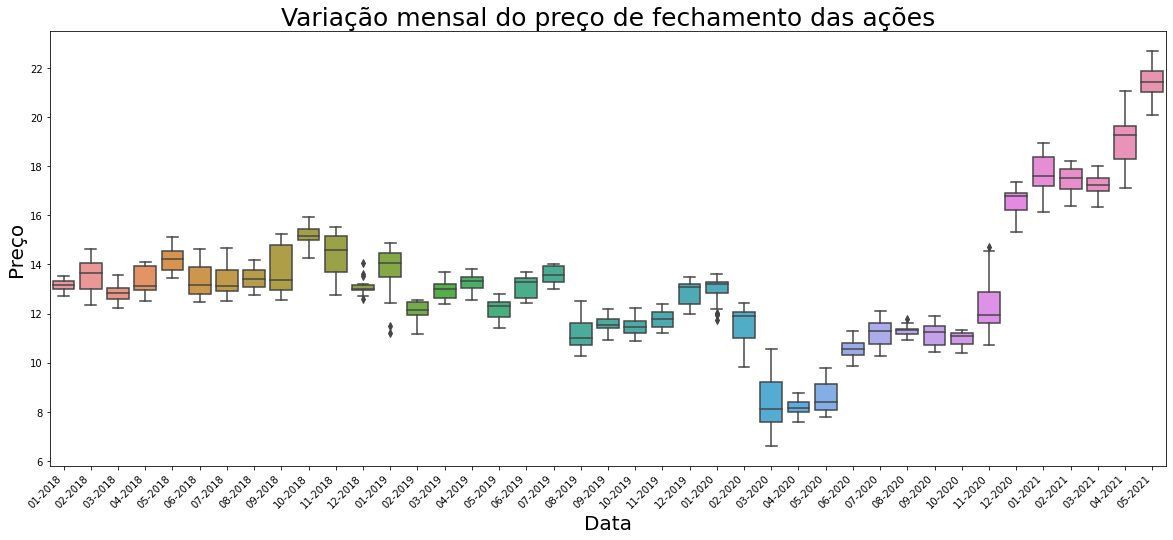

In [134]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
dados['mes_ano'] = dados['Date'].dt.strftime('%m-%Y')
sns.boxplot(dados['mes_ano'], dados['Close'], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Variação mensal do preço de fechamento das ações', fontsize = 25)
plt.xlabel('Data', fontsize = 20)
plt.ylabel('Preço',fontsize= 20)
plt.show()

- **Valores máximos e mínimos de cada dia em todo período de análise**

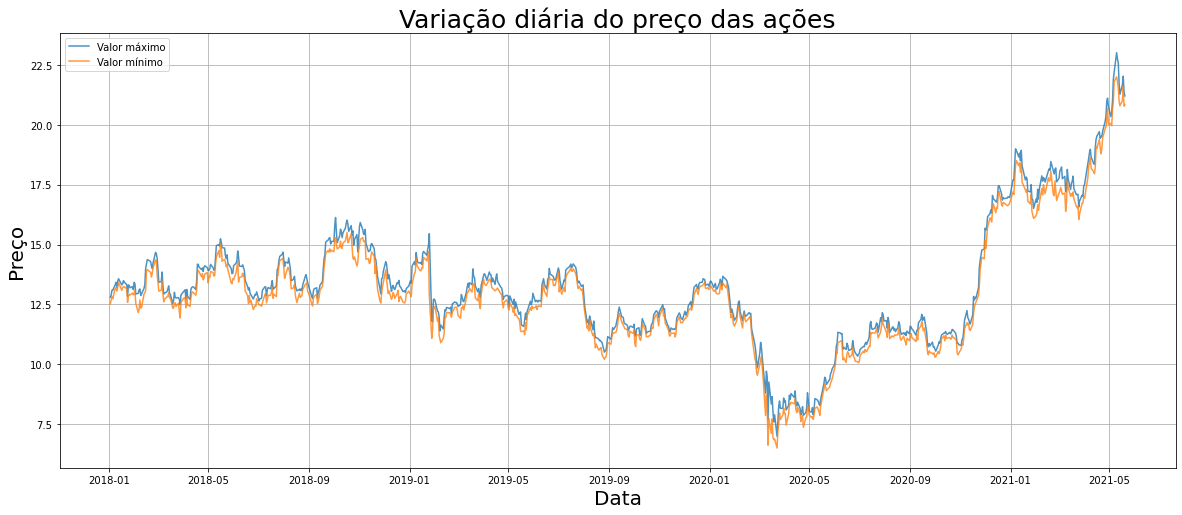

In [135]:
plt.figure(figsize=(20,8))
plt.plot(dados['Date'], dados['High'], alpha = 0.8)
plt.plot(dados['Date'], dados['Low'], alpha = 0.8)
plt.grid()
plt.title('Variação diária do preço das ações', fontsize = 25)
plt.legend(['Valor máximo','Valor mínimo'])
plt.xlabel('Data', fontsize = 20)
plt.ylabel('Preço',fontsize= 20)
plt.show()

- **Destacando o período de queda no preço das ações em 2020**

Text(0.5, 0, 'Data')

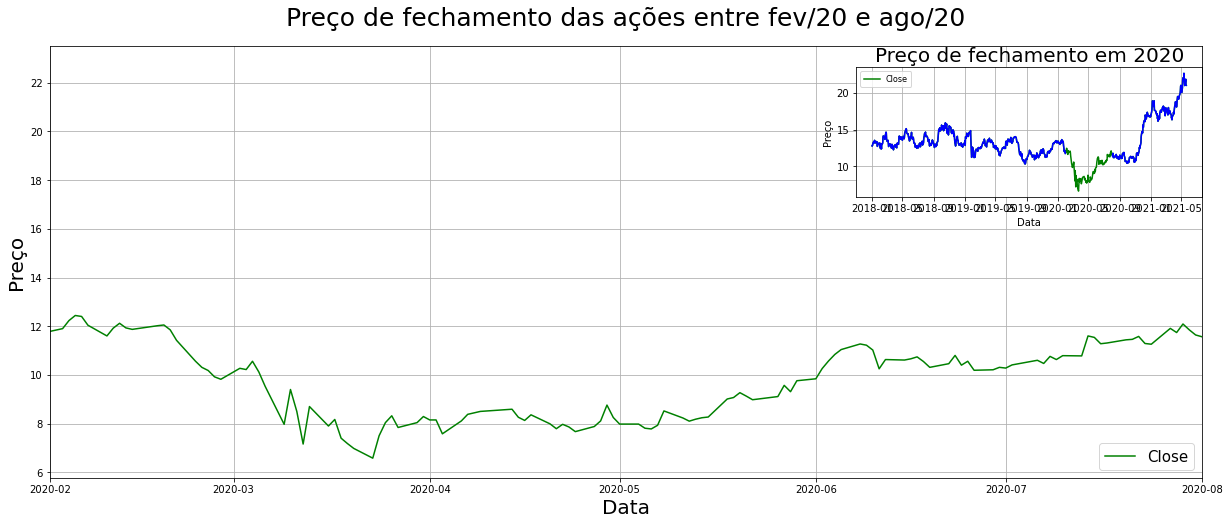

In [136]:
#acrescentando dados no eixo menor
fig = plt.figure(figsize=(16,6))
axes = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.7,0.65,0.3,0.3])

axes.grid(True)
axes.plot(dados['Date'], dados['Close'], color = 'green')
#axes.set_ylim(270,320)
axes.set_xlim(datetime.datetime(2020,2,1),datetime.datetime(2020,8,1) )
axes.set_title('Preço de fechamento das ações entre fev/20 e ago/20', fontsize = 25, pad = 20)
axes.legend(['Close'], loc='lower right', fontsize = 15) #utilizando best o matplotlib decide onde é melhor
axes.set_ylabel('Preço', fontsize=20)
axes.set_xlabel('Data', fontsize=20)

azul_esquerda = dados['Date'] < datetime.datetime(2020,2,1)
azul_direita = dados['Date'] > datetime.datetime(2020,8,1)

axes2.grid(True)
axes2.plot(dados['Date'], dados['Close'], color = 'g')
axes2.plot(dados[azul_esquerda]['Date'],dados[azul_esquerda]['Close'], color = 'blue')
axes2.plot(dados[azul_direita]['Date'],dados[azul_direita]['Close'], color = 'blue')
#axes2.set_xlim(datetime.datetime(2020,1,1),datetime.datetime(2021,1,1) )
axes2.set_title('Preço de fechamento em 2020', fontsize = 20)
axes2.legend(['Close'], loc='best', fontsize = 8) #utilizando best o matplotlib decide onde é melhor
axes2.set_ylabel('Preço', fontsize=10)
axes2.set_xlabel('Data', fontsize=10)

A queda no preço das ações no primeiro trimestre de 2020 conforme destacado no gráfico acima, teve como alguns dos fatores a alta do dolar e a redução na produção e vendas de minério por conta da pandemia da Covid-19.

# <font color='red' style='font-size: 30px;'>Análise Técnica</font>
<hr style='border: 2px solid red;'>

## Taxa de Retorno Simples e Logaritmica

Quando queremos explorar o potencial de algum ativo na bolsa de valores uma das análises fundamentalistas mais simples que podemos fazer se refere a calcular a taxa de retorno simples e logarítmica de algum ativo.

Basicamente realizamos isso com duas premissas principais:

- Calcular o percentual da taxa de retorno de um investimento .
- Comparar com outros investimentos.

Essa taxa demonstra a percentagem, de maneira direta, do resultado de um investimento em um intervalo de tempo específico.

A taxa de retorno simples normalmente é utilizada quando queremos lidar com vários ativos ao mesmo tempo. Já a taxa de retorno logarítmica é preferível quando realizamos cálculos sobre um único ativo ao longo de um período de tempo.

In [137]:
## Dividindo o número de fechamento pelo dia de fechamento do dia anterior com o uso do shift.
dados['simple_return'] = (dados['Adj Close'] / dados['Adj Close'].shift(1)) - 1

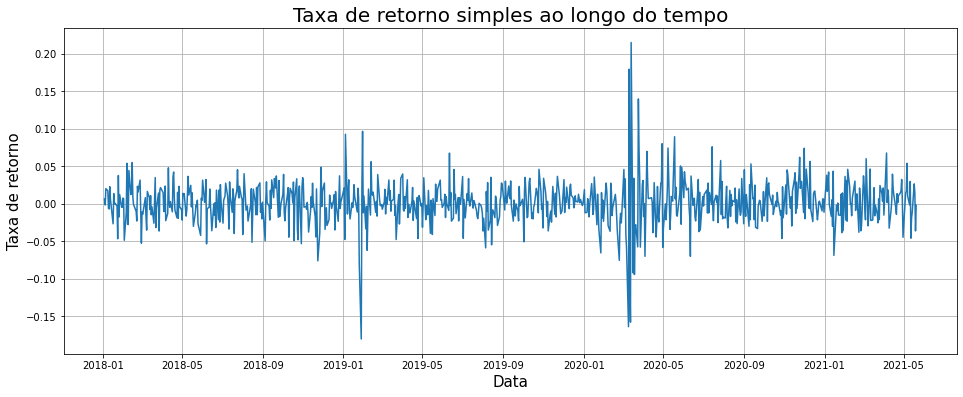

In [138]:
## Plotando a taxa de retorno simples
plt.figure(figsize=(16,6))
plt.plot(dados['Date'],dados['simple_return'])
plt.grid()
plt.title('Taxa de retorno simples ao longo do tempo', fontsize = 20)
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Taxa de retorno',fontsize= 15)
plt.show()


É possível observar pelo gráfico que a Vale possuiu taxa de retorno com um comportamento costante, que não atinge picos muito altos nem muito baixos no geral. Entretanto houveram alguns períodos com retornos bastante negativos, como no caso do primeiro mês do ano de 2019, que foi quando aconteceu o rompimento da barragem em Brumadinho e no primeiro semestre de 2020 entre os meses de março e abril, no ínicio da pandemia do Covid-19.

In [139]:
## Retorno médio diário ao longo do tempo
retorno_medio_diario = dados['simple_return'].mean() * 250
print(round(retorno_medio_diario,5) * 100)

29.781000000000002


In [140]:
## Criando nova coluna com os valores de log return
dados['log_return'] = np.log(dados['Adj Close']/dados['Adj Close'].shift(1))
## Calculando o retorno médio diário ao longo do tempo
retorno_medio_diario = dados['log_return'].mean() * 250
print(round(retorno_medio_diario, 5) * 100)

19.198999999999998
